# <a id='toc1_'></a>[Limits of diversification and CPPI](#toc0_)
3rd week, 1st section, Introduction to Portfolio Construction and Analysis with Python.
Vijay Vaidyanathan & Lionel Martellini.  
Notes and code written by Benoît MARION.

**Table of contents**<a id='toc0_'></a>    
- [Limits of diversification and CPPI](#toc1_)    
  - [Lecture 1 - Limits of diversification](#toc1_1_)    
  - [Lecture 2 - An introduction to CPPI (Constant Proportion Portfolio Protection)](#toc1_2_)    
  - [Lecture 3 - Extensions to CPPI (Constant Proportion Portfolio Protection)](#toc1_3_)    
  - [Lecture 4 - Simulating asset returns using random walks](#toc1_4_)    
  - [Lab 1 - Limits of diversification](#toc1_5_)    
    - [Importing our new files to create indexes](#toc1_5_1_)    
    - [Computing value-weighted indexes](#toc1_5_2_)    
    - [Rolling average](#toc1_5_3_)    
    - [Rolling correlations & MultiIndexes](#toc1_5_4_)    
  - [Lab 2 - Implementing CPPI](#toc1_6_)    
    - [Importing modules and data to get the different asset](#toc1_6_1_)    
    - [Initializing the values](#toc1_6_2_)    
    - [CPPI algorithm](#toc1_6_3_)    
    - [CPPI results](#toc1_6_4_)    
    - [Functions we made to get summary stats and CPPI](#toc1_6_5_)    
    - [Improving our functions to address drawdowns](#toc1_6_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Lecture 1 - Limits of diversification](#toc0_)

Things that diversification **is effective** at: 

1. the way to increase the reward per unit of risk;
2. the way way to decrease **idiosyncratic or specific** risk: in fact, it allows investors to reduce specific risk within their portfolios, which is how they can achieve a high reward per unit of risk.

Things that diversification **is not effective** at: 

1. diversification **is not** an effective way to decrease the **systemic risk**: basically, if the entire market collapses, it does not really matter how much your portfolio is diversified since correlation levels tend to increase and diversification benefits tend to disappear.
 
In the following, we want to highlight the last point, i.e., we want to show that in case of huge financial crisis the diversification of a portfolio is not a guarantee of less risk.
  
The only solution is to use hedging techniques from the risk, like insurance (dynamic hedging).

## <a id='toc1_2_'></a>[Lecture 2 - An introduction to CPPI (Constant Proportion Portfolio Protection)](#toc0_)

Dynamic allocation total assets between the risky and riskfree asset in order to construct convex payoffs (you can obtain positive payoffs while having a real downside protection) without options. 
  
To do so one has to define the level of loss he can face and allocate in a dynamic way the difference between the total value and the floor value multiplied by a certain factor. If the risky portfolio looses value one just has to recalculate the difference and trade. That way the total portfolio can never have a lower value than the floor. 
  
For instance if you have 100€ and you want to keep 80€, the multiplier is 3 so you allocate 60€ to the risky asset and 40€ to the riskfree. If yhe risky portfolio get to 50€, the total portfolio value gets to 90€ so you reallocate 60€ to the riskfree asset and 30€ the risky.  
 
The best way to implement this strategy would be to do it on a daily basis but with transaction costs it is often impossible which leads to a risk of getting below the floor (know as gap risk). To avoid that the multiplier should be inferior the inverse of the potential maximum loss of the risky portfolio (for instance 1/(20%)=5 as a maximum multiplier).

## <a id='toc1_3_'></a>[Lecture 3 - Extensions to CPPI (Constant Proportion Portfolio Protection)](#toc0_)

Common suitable extensions can accomodate:
- maximum drawdown constraints: $ V_t>\alpha M_t $ where $M_t$ is the maximum of the portfolio value since its creation and $1 - \alpha$ is the maximum acceptable drawdown.
- cap on  the performance: 1) define a cap and a treshold between the flor and the cap, 2) if the portfolio are under it $\rightarrow$  classic CPPI, 3) if above (since you want to limit risks as you are getting closer to the cap) you just allocate the multiplier times the difference between the cap and tha actual value.   
The treshold is when $ multiplier \times (Treshold_t-Floor_t)= multiplier \times (Cap_t-Treshold_t) \Longleftrightarrow T_t=\frac{C_t+F_t}{2}$

## <a id='toc1_4_'></a>[Lecture 4 - Simulating asset returns using random walks](#toc0_)

In a basic stochastic framework, we can decompose the return of a risky asset into a deterministic part (the expected return) and a stochastic part (random walk without memory). $$ \frac{dS_t}{S_t} = \underbrace{(r+\sigma\lambda)}_{=\mu}dt+\sigma dW_t $$
The deterministic part can be itself divided as the sum of the riskfree rate and the risk premium (volatility multiplied by the sharpe ratio).   
  
The stocastic component is related to the brownian motion which main caracteristic is its lack of memory. The value of this process is 0 on average but its volatility increases with time. Each increment follows a normal distribution. Due to these features, we have that $\mathbb{E}[W_t]=0$, $\text{Var}(W_t) = t$ for a fixed time $t$

On the opposite side, logically, the riskfree asset is only deterministic: $\frac{dRF_t}{RF_t}=rdt$  
  
This whole framework is the basis of the estimation of returns in a stochastic way.

## <a id='toc1_5_'></a>[Lab 1 - Limits of diversification](#toc0_)

### <a id='toc1_5_1_'></a>[Importing our new files to create indexes](#toc0_)

In [2]:
import add_doc_path
import finance_pkg.Edhec_risk_kit as erk
import pandas as pd
import numpy as np

We want to import new dataset from the git repository and save them into our computer to compute ourselves indexes:
```python
file=pd.read_csv("https://raw.githubusercontent.com/z4ir3/finance-courses/master/data/ind30_m_nfirms.csv")
file.to_csv("~/Introduction to Portfolio Construction and Analysis with Python (MOOC EDHEC)/Data/ind30_m_nfirms.csv")

file=pd.read_csv("https://raw.githubusercontent.com/z4ir3/finance-courses/master/data/ind30_m_size.csv")
file.to_csv("~/Introduction to Portfolio Construction and Analysis with Python (MOOC EDHEC)/Data/ind30_m_size.csv")
````
We have built function to import them directly in our environment in our toolkit.

In [3]:
ind_returns=erk.get_ind_returns()
ind_nfirms=erk.get_ind_nfirms()
ind_size=erk.get_ind_size()

### <a id='toc1_5_2_'></a>[Computing value-weighted indexes](#toc0_)

To get the total market cap, we just have to get the market cap per industry and sum it accross industries. As we can see and imagine, there have been a dramatic increase since 1926.

<AxesSubplot: >

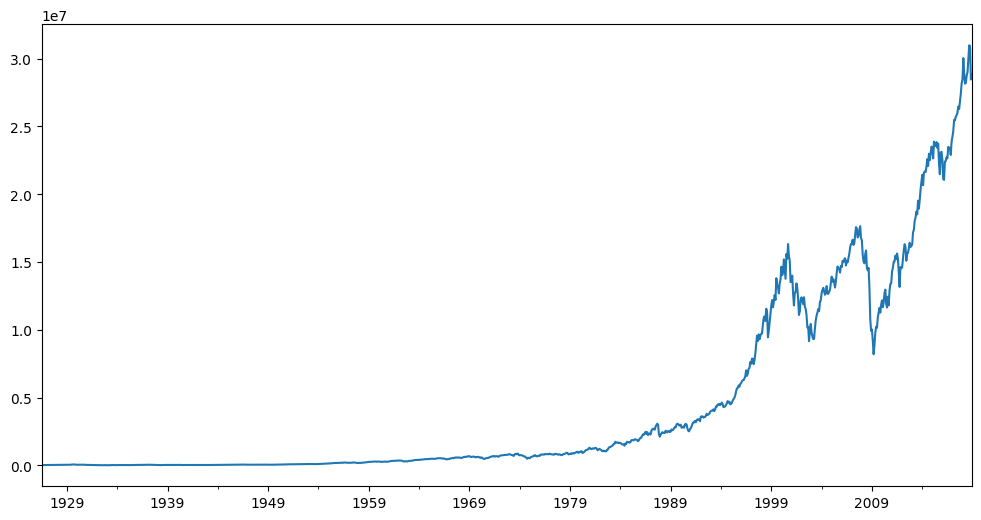

In [11]:
ind_mktcap=ind_nfirms*ind_size
total_mktcap=ind_mktcap.sum(axis="columns")
total_mktcap.plot(figsize=(12,6))

We can then get the share per industry of the total capitalization, and then see the evolutions accross time in repartition of the value. For instance, in the 20s, steel was a very important share of the equity market but has become less important over time (doesn't mean that the value has lowered as the global capitalization has largely increased).

<AxesSubplot: >

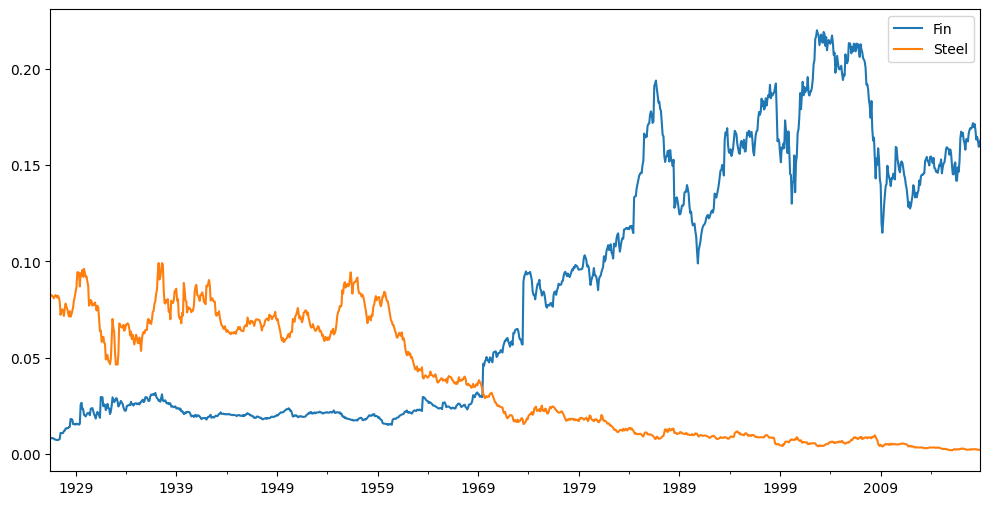

In [16]:
ind_cap_weight=ind_mktcap.divide(total_mktcap,axis="rows")
ind_cap_weight[["Fin","Steel"]].plot(figsize=(12,6))

By multiplying the weights per the returns we can get the average market return weighted per industry.

<AxesSubplot: >

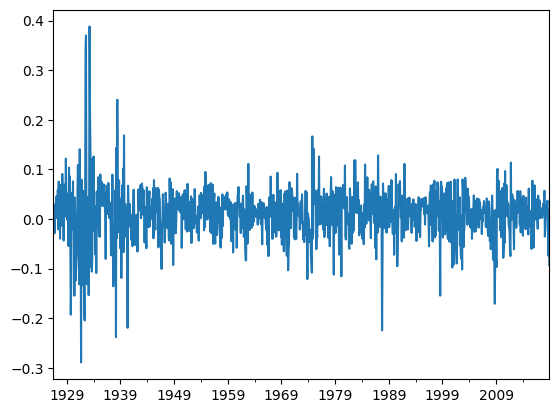

In [17]:
total_market_return=(ind_cap_weight*ind_returns).sum(axis="columns")
total_market_return.plot()

### <a id='toc1_5_3_'></a>[Rolling average](#toc0_)

We just convert it into an index and get trailing index for the 1980-2017 period.

<AxesSubplot: >

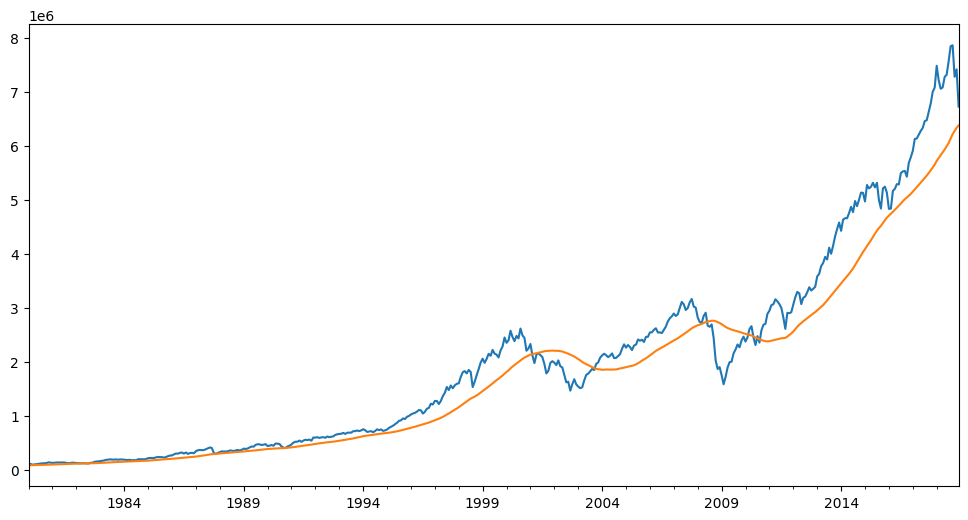

In [28]:
total_market_index=erk.drawdowns(total_market_return).wealth_index
total_market_index["1980":].plot(figsize=(12,6))
total_market_index.rolling(window=36).mean()["1980":].plot()

<AxesSubplot: >

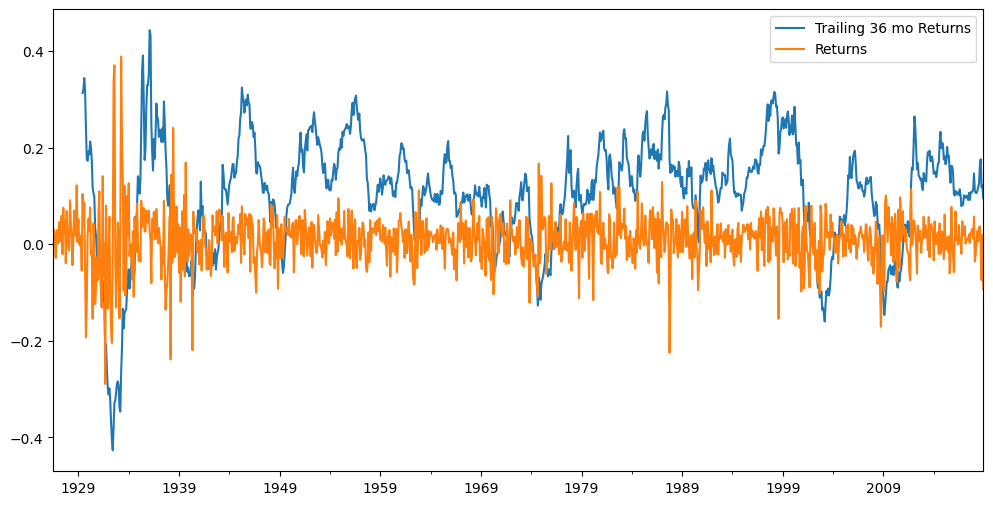

In [47]:
tmi_tr36rets= total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,6),label="Trailing 36 mo Returns",legend=True)
total_market_return.plot(label="Returns",legend=True)

### <a id='toc1_5_4_'></a>[Rolling correlations & MultiIndexes](#toc0_)
Applying the method correlation gives us a matrix of matrixes with a multi-level indexing. We need to compute the average correlation per period.

In [51]:
ts_corr=ind_returns.rolling(36).corr() 
ts_corr.index.names=['dates','industry']

<AxesSubplot: xlabel='dates'>

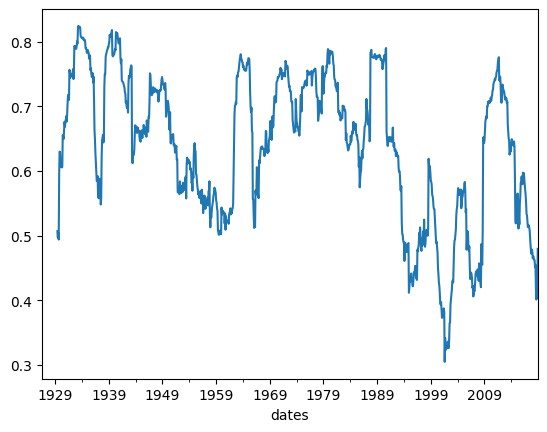

In [53]:
ind_tr36corr=ts_corr.groupby(level='dates').apply(lambda cormat: cormat.values.mean())
ind_tr36corr.plot()

<AxesSubplot: >

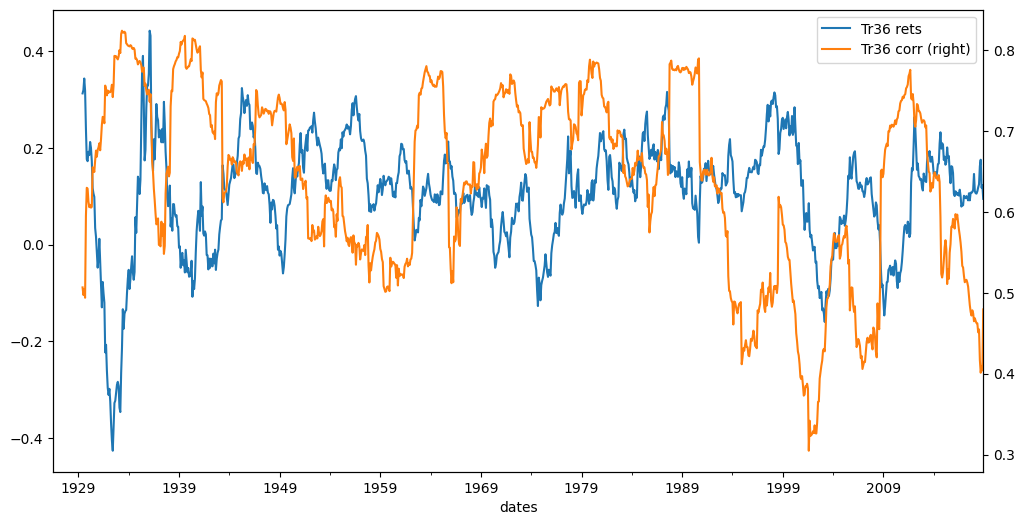

In [58]:
tmi_tr36rets.plot(label="Tr36 rets",legend=True,figsize=(12,6))
ind_tr36corr.plot(label="Tr36 corr",legend=True,secondary_y=True)

Clearly correlations are going up when the market plunges, this highliths the fact that diversification in not a functionning strategy to limit the impact of systemic risk on a portfolio.

In [82]:
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884026

## <a id='toc1_6_'></a>[Lab 2 - Implementing CPPI](#toc0_)

The objective of our algorithm is to dynamicly allocate between the risky and the safe investment according to the evolution of the risky asset and our treshold. 

### <a id='toc1_6_1_'></a>[Importing modules and data to get the different asset](#toc0_)

In [1]:
import add_doc_path
import finance_pkg.Edhec_risk_kit as erk
import pandas as pd
import numpy as np

In [2]:
ind_return=erk.get_ind_returns()
tmi_return=erk.get_total_market_index_returns()

In [3]:
risky_r=ind_return["2000":][["Steel","Fin","Beer"]]
safe_r=pd.DataFrame().reindex_like(risky_r)
safe_r[:]=0.03/12

### <a id='toc1_6_2_'></a>[Initializing the values](#toc0_)

In [4]:
start=1000 #starting value of our potfolio
floor=.8 #minimum we want to keep
m=3 #multiplier
dates=risky_r.index #get the list of dates
n_steps=len(dates) #get the lenght of the dates
account_value=start #current account value (floor at t=0)
floor_value=start*floor #floor as an amount of money

# various DF to keep records of our investment
account_history=pd.DataFrame().reindex_like(risky_r)
cushion_history=pd.DataFrame().reindex_like(risky_r)
risky_w_history=pd.DataFrame().reindex_like(risky_r)

### <a id='toc1_6_3_'></a>[CPPI algorithm](#toc0_)

At each period we need to do 3 things:
1. Compute the cushion as a share of the account value
2. Get the weights allocated to the risky asset
3. Restart the process

The following loop is the entire CPPI algorithm.

In [5]:
for step in range(n_steps):
    #1
    cushion=(account_value-floor_value)/account_value
    
    #2
    risky_w=m*cushion 
    risky_w=np.minimum(risky_w,1) #to avoid using leverage 
    risky_w=np.maximum(risky_w,0)
    safe_w=1-risky_w
    risky_alloc=account_value*risky_w
    safe_alloc=account_value*safe_w
    
    #update the account value for the next loop
    account_value=risky_alloc*(1+risky_r.iloc[step])+safe_alloc*(1+safe_r.iloc[step])
    
    #keeping the record
    cushion_history.iloc[step]=cushion
    risky_w_history.iloc[step]=risky_w
    account_history.iloc[step]=account_value

### <a id='toc1_6_4_'></a>[CPPI results](#toc0_)

For the sake of comparision we compute the allocation to the risky asset only.

In [6]:
risky_wealth=start*(1+risky_r).cumprod()

Plots of the results:

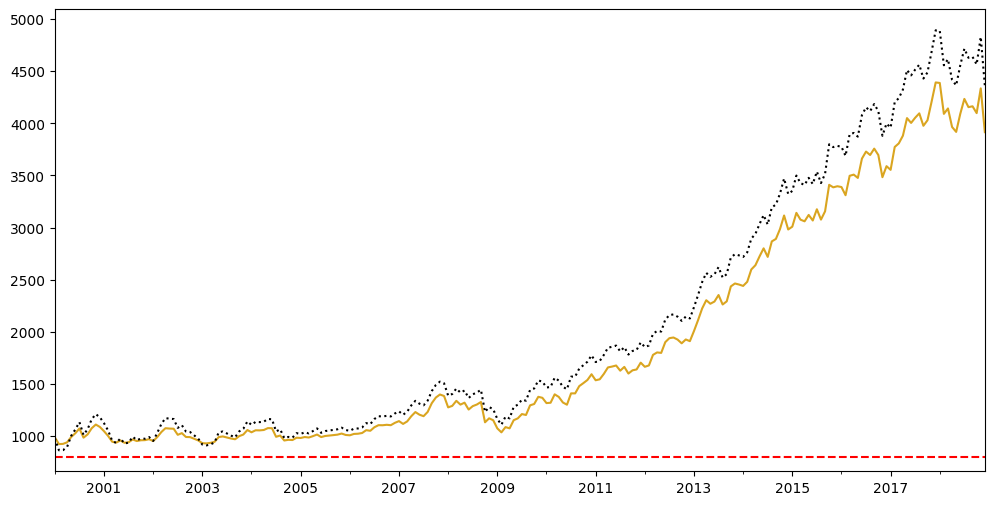

In [7]:
ax=account_history["Beer"].plot(figsize=(12,6), color="goldenrod")
risky_wealth["Beer"].plot(ax=ax, style="k:")
ax.axhline(y=floor_value,color='r',linestyle="--")

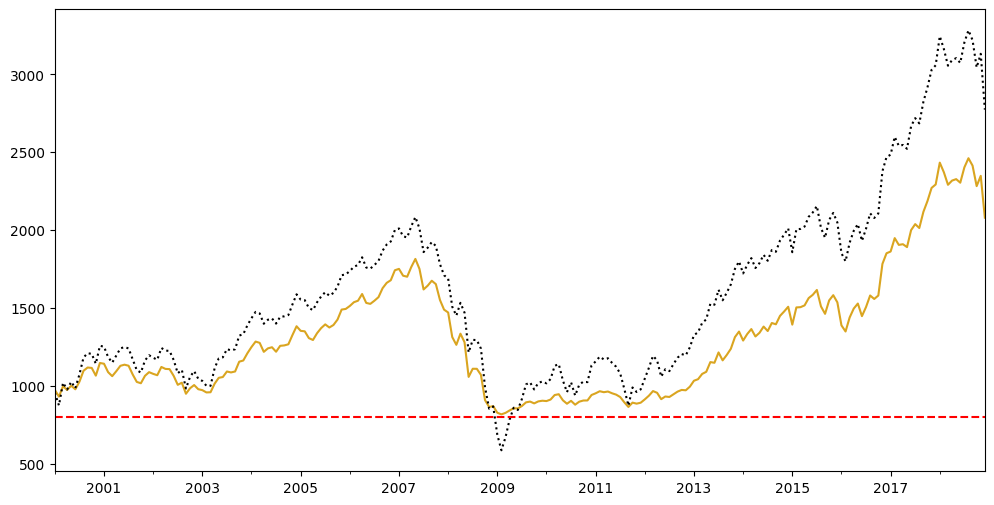

In [8]:
ax=account_history["Fin"].plot(figsize=(12,6), color="goldenrod")
risky_wealth["Fin"].plot(ax=ax, style="k:")
ax.axhline(y=floor_value,color='r',linestyle="--")

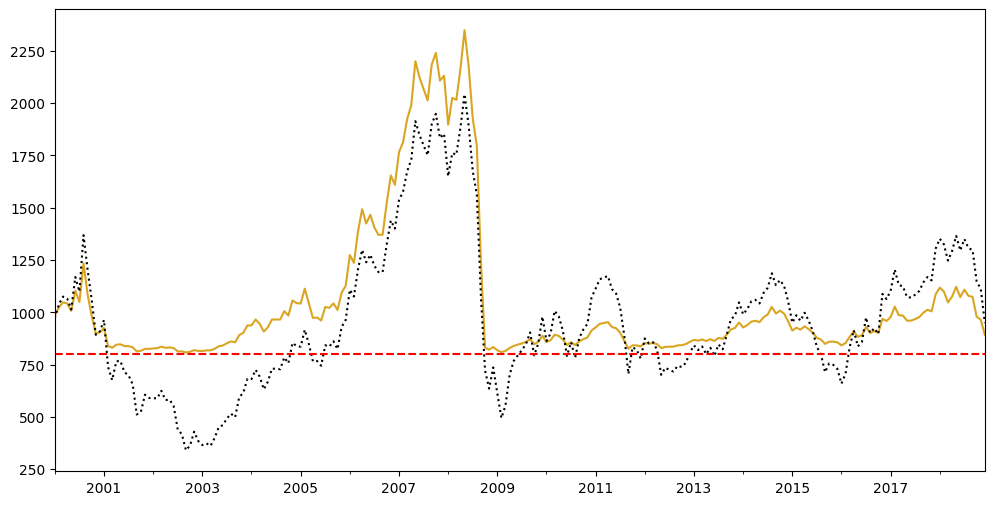

In [9]:
ax=account_history["Steel"].plot(figsize=(12,6), color="goldenrod")
risky_wealth["Steel"].plot(ax=ax, style="k:")
ax.axhline(y=floor_value,color='r',linestyle="--")

As we can see CPPI makes variations smoother and limits the losses in periods of deep crisis. However it also makes returns smaller on good periods.

### <a id='toc1_6_5_'></a>[Functions we made to get summary stats and CPPI](#toc0_)

In [10]:
erk.summary_stats(risky_r)

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.002790,0.312368,-0.326334,4.144381,0.150139,0.208117,-0.102567,-0.758017
Fin,0.055166,0.192909,-0.533218,4.995534,0.091224,0.132175,0.126718,-0.718465
Beer,0.080598,0.138925,-0.493545,4.173881,0.063015,0.091442,0.354314,-0.271368


In [11]:
btr=erk.run_cppi(risky_r)
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.091995,0.130153,-0.196750,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.065535,0.091621,0.080352,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,0.074908,0.383772,-0.259582


As we can see on the sumary stats, we have succesfully limited risk on the downside (cf Max Drawdown).

<AxesSubplot: >

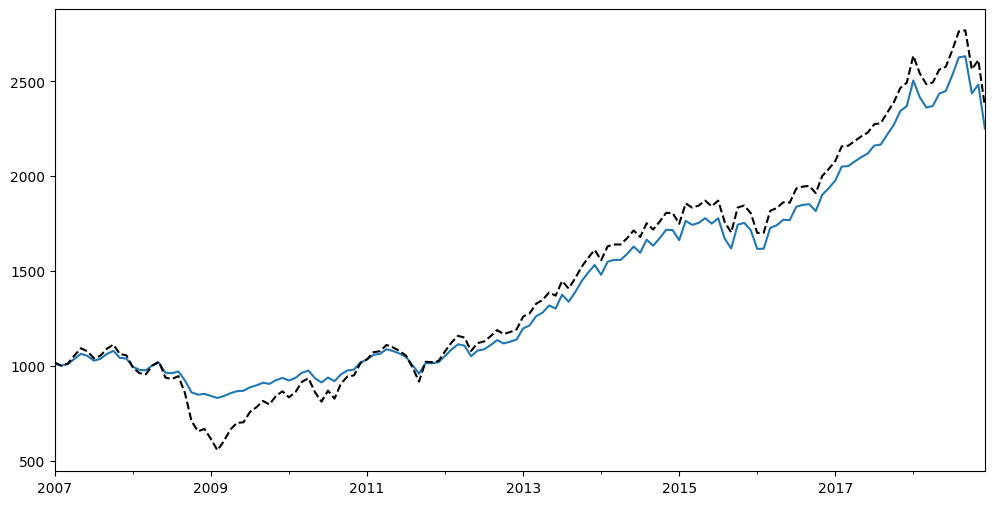

In [12]:
btr=erk.run_cppi(tmi_return["2007":])
ax=btr["Wealth"].plot(figsize=(12,6),legend=False)
btr["Risky Wealth"].plot(legend=False,ax=ax,style='k--')

In [13]:
pd.concat([erk.summary_stats(btr["Risky Wealth"].pct_change().dropna()),erk.summary_stats(btr["Wealth"].pct_change().dropna())])

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.071592,0.096315,0.280618,-0.499943
R,0.069416,0.100381,-0.588292,3.740932,0.045678,0.062953,0.382052,-0.229683


With another series we get the same results and avoid the 2008 crisis. But we can address drawdowns even better.

### <a id='toc1_6_6_'></a>[Improving our functions to address drawdowns](#toc0_)

<AxesSubplot: >

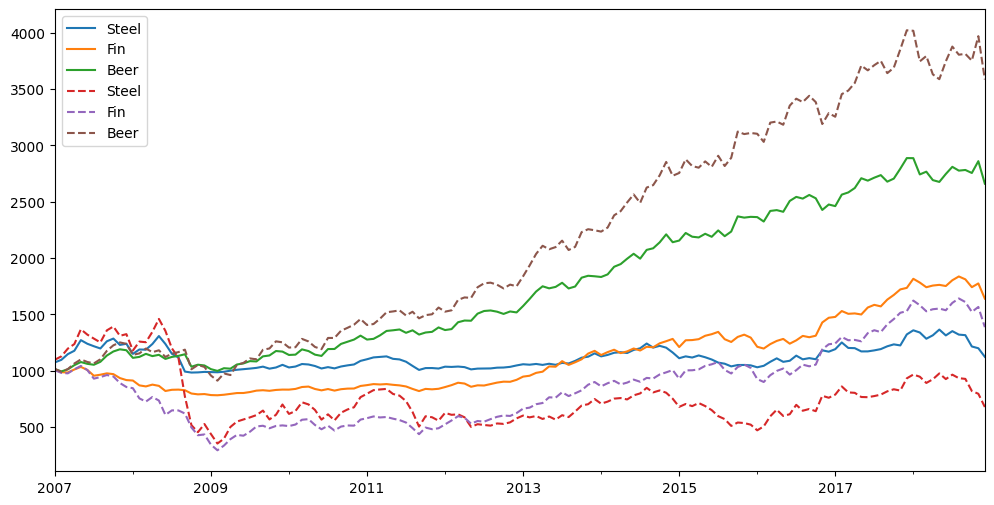

In [18]:
btr=erk.run_cppi(ind_return["2007":][["Steel","Fin","Beer"]],drawdown=.25)
ax=btr["Wealth"].plot(figsize=(12,6))
btr["Risky Wealth"].plot(ax=ax,style='--')

In [19]:
pd.concat([erk.summary_stats(btr["Risky Wealth"].pct_change().dropna()),erk.summary_stats(btr["Wealth"].pct_change().dropna())])

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.152288,0.203837,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.105744,0.149862,-0.012370,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.056497,0.077388,0.620132,-0.271368
Steel,0.003784,0.097073,-0.441089,5.220481,0.047371,0.066991,-0.262958,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.038342,0.054111,0.136964,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.037937,0.051189,0.613413,-0.161186
